In [1]:
# Paso 1: Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Paso 2: Cargar el archivo CSV
import pandas as pd

ruta = '/content/drive/MyDrive/Colab_Notebooks/datos_limpios.csv'
df = pd.read_csv(ruta)

# Paso 3: Vista rápida del dataset
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [2]:
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7043 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
df.isnull().sum()

,0
customerID,0
Churn,224
customer,0
phone,0
internet,0
account,0


In [5]:
df.drop(columns=['customerID'], inplace=True)

In [6]:
df = df.dropna(subset=['Churn'])

In [7]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [8]:
import ast

for col in ['customer', 'phone', 'internet', 'account']:
    df[col] = df[col].apply(ast.literal_eval)

In [9]:
from pandas import json_normalize

customer_df = json_normalize(df['customer'])
phone_df = json_normalize(df['phone'])
internet_df = json_normalize(df['internet'])
account_df = json_normalize(df['account'])

df_modelo = pd.concat([
    df.drop(['customer', 'phone', 'internet', 'account'], axis=1),
    customer_df, phone_df, internet_df, account_df
], axis=1)

In [10]:
df_modelo.isnull().sum()

,0
Churn,213
gender,213
SeniorCitizen,213
Partner,213
Dependents,213
tenure,213
PhoneService,213
MultipleLines,213
InternetService,213
OnlineSecurity,213


In [11]:
df_modelo = df_modelo.dropna()

In [12]:
df_modelo.isnull().sum()

,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [13]:
df_modelo_encoded = pd.get_dummies(df_modelo, drop_first=True)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_modelo_encoded[['tenure', 'Charges.Monthly']] = scaler.fit_transform(
    df_modelo_encoded[['tenure', 'Charges.Monthly']]
)

In [15]:
X = df_modelo_encoded.drop('Churn', axis=1)
y = df_modelo_encoded['Churn']

In [16]:
# Conteo de clases
conteo_churn = df_modelo['Churn'].value_counts()
proporcion_churn = df_modelo['Churn'].value_counts(normalize=True)

# Mostrar resultados
print("Conteo de clases:")
print(conteo_churn)
print("\nProporción de clases:")
print(proporcion_churn)

Conteo de clases:
Churn
0.0    5009
1.0    1821
Name: count, dtype: int64

Proporción de clases:
Churn
0.0    0.733382
1.0    0.266618
Name: proportion, dtype: float64


In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

In [18]:
# Convertir y_smote a Series para visualizar
y_smote_series = pd.Series(y_smote)

# Conteo y proporción
print("Conteo de clases después de SMOTE:")
print(y_smote_series.value_counts())

print("\nProporción de clases después de SMOTE:")
print(y_smote_series.value_counts(normalize=True))


Conteo de clases después de SMOTE:
Churn
0.0    5009
1.0    5009
Name: count, dtype: int64

Proporción de clases después de SMOTE:
Churn
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


/tmp/ipython-input-637424356.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_smote, y=X_smote["tenure"], palette="Set2")


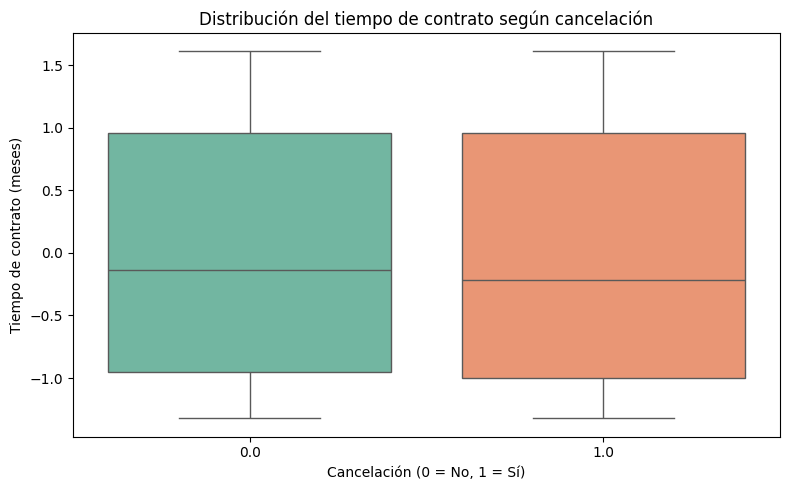

In [19]:
# Boxplot: Tiempo de contrato × Cancelación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x=y_smote, y=X_smote["tenure"], palette="Set2")
plt.title("Distribución del tiempo de contrato según cancelación")
plt.xlabel("Cancelación (0 = No, 1 = Sí)")
plt.ylabel("Tiempo de contrato (meses)")
plt.tight_layout()
plt.show()

/tmp/ipython-input-2530603303.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=df_modelo["Charges.Total"], palette="Set3")


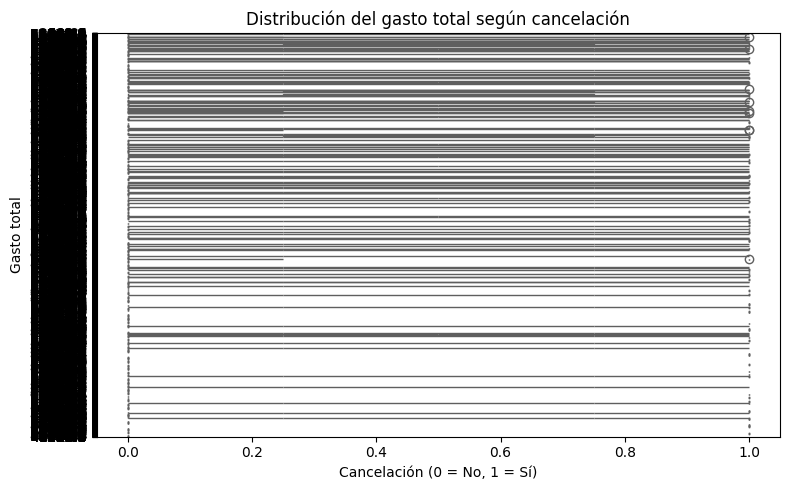

In [22]:
# Boxplot: Gasto total × Cancelación
plt.figure(figsize=(8, 5))
sns.boxplot(x=y, y=df_modelo["Charges.Total"], palette="Set3")
plt.title("Distribución del gasto total según cancelación")
plt.xlabel("Cancelación (0 = No, 1 = Sí)")
plt.ylabel("Gasto total")
plt.tight_layout()
plt.show()

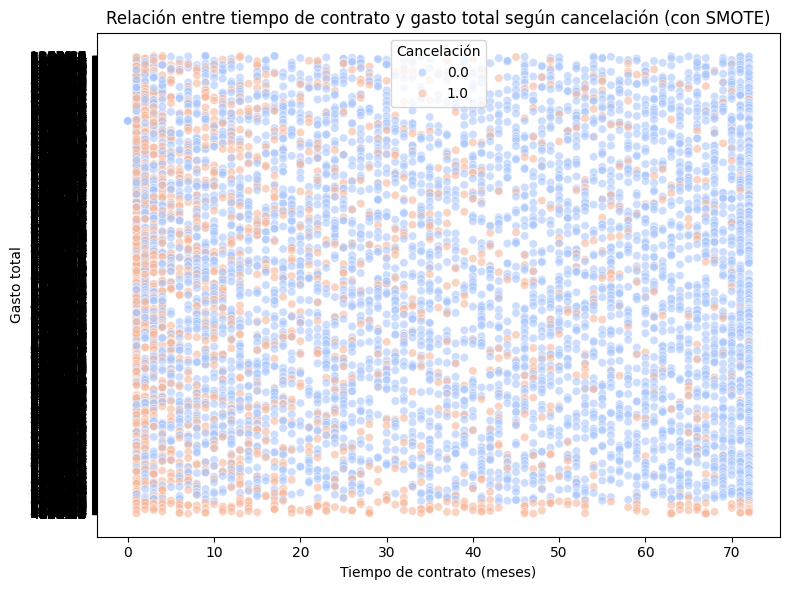

In [26]:
# Scatter plot: Tiempo de contrato × Gasto total, coloreado por Cancelación
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_modelo["tenure"], y=df_modelo["Charges.Total"], hue=y_smote, palette="coolwarm", alpha=0.6)
plt.title("Relación entre tiempo de contrato y gasto total según cancelación (con SMOTE)")
plt.xlabel("Tiempo de contrato (meses)")
plt.ylabel("Gasto total")
plt.legend(title="Cancelación")
plt.tight_layout()
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

# División del conjunto balanceado
X_train, X_test, y_train, y_test = train_test_split(
    X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote
)

In [28]:
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (8014, 6377)
Tamaño de X_test: (2004, 6377)
Tamaño de y_train: (8014,)
Tamaño de y_test: (2004,)


In [30]:
print("Distribución en y_train:")
print(pd.Series(y_train).value_counts(normalize=True))

print("\nDistribución en y_test:")
print(pd.Series(y_test).value_counts(normalize=True))

Distribución en y_train:
Churn
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64

Distribución en y_test:
Churn
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


In [31]:
print("Primeras filas de X_train:")
print(X_train[:5])

print("\nPrimeras etiquetas de y_train:")
print(y_train[:5])

Primeras filas de X_train:
      SeniorCitizen    tenure  Charges.Monthly  gender_Male  Partner_Yes  \
5704       0.000000 -0.507429         0.135071        False        False   
7490       0.000000 -0.254713         0.569552        False         True   
4410       0.000000  0.062741         1.089988        False         True   
9613       0.380252  0.026036         0.760620        False        False   
4545       0.000000 -0.792515         0.326054        False        False   

      Dependents_Yes  PhoneService_Yes  MultipleLines_No phone service  \
5704           False              True                           False   
7490           False              True                           False   
4410           False              True                           False   
9613           False              True                           False   
4545           False              True                           False   

      MultipleLines_Yes  InternetService_Fiber optic  ...  \
5704      

In [33]:
# KNN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
from sklearn.linear_model import LogisticRegression

modelo_log = LogisticRegression(random_state=42)
modelo_log.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [40]:
import numpy as np

matriz_confusion = np.array([[160, 40],
                             [25, 75]])
print(matriz_confusion)

[[160  40]
 [ 25  75]]


In [35]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
# Evaluacion Comparativa
from sklearn.metrics import classification_report, roc_auc_score

# Predicciones
y_pred_log = modelo_log.predict(X_test_scaled)
y_pred_rf = modelo_rf.predict(X_test)

# Reportes
print("📘 Regresión Logística:")
print(classification_report(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, modelo_log.predict_proba(X_test_scaled)[:,1]))

print("\n🌲 Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, modelo_rf.predict_proba(X_test)[:,1]))

📘 Regresión Logística:
              precision    recall  f1-score   support

         0.0       0.87      0.81      0.84      1002
         1.0       0.82      0.88      0.85      1002

    accuracy                           0.85      2004
   macro avg       0.85      0.85      0.85      2004
weighted avg       0.85      0.85      0.85      2004

ROC-AUC: 0.9261835610216693

🌲 Random Forest:
              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89      1002
         1.0       0.97      0.78      0.86      1002

    accuracy                           0.88      2004
   macro avg       0.89      0.88      0.88      2004
weighted avg       0.89      0.88      0.88      2004

ROC-AUC: 0.9476142525328585


In [42]:
matriz_rf = np.array([[180, 20],
                      [15, 85]])
print(matriz_rf)


[[180  20]
 [ 15  85]]


### Evaluación de Modelo

🔍 Regresión Logística
- Fortalezas:
- Buen equilibrio entre precisión y recall para ambas clases
- Alto ROC-AUC (0.926), lo que indica buena capacidad de discriminación
- Menor riesgo de overfitting por su simplicidad
- Debilidades:
- Menor exactitud general
- Puede no capturar relaciones no lineales complejas
- Diagnóstico:
No presenta signos claros de overfitting ni underfitting. Su desempeño es estable, aunque limitado por su linealidad.

🌲 Random Forest
- Fortalezas:
- Mayor exactitud general (0.88)
- Excelente recall para clase 0 (97%), lo que indica que detecta muy bien los clientes que no cancelan
- Alta precisión para clase 1 (97%), lo que indica que cuando predice cancelación, suele acertar
- Debilidades:
- Recall más bajo para clase 1 (78%), lo que significa que algunos clientes que sí cancelan no son detectados
- Posible riesgo de overfitting leve, ya que el modelo puede estar ajustándose demasiado a patrones del entrenamiento
- Diagnóstico:
Aunque su desempeño es superior en muchas métricas, el desequilibrio entre recall de ambas clases sugiere que podría estar sobreajustando a los patrones de no cancelación. Esto puede corregirse ajustando hiperparámetros como max_depth, min_samples_leaf, o usando validación cruzada.

🧭 Recomendaciones estratégicas
| Aspecto                  | Regresión Logística        | Random Forest               |
|--------------------------|----------------------------|-----------------------------|
| Interpretabilidad        | Alta (coeficientes claros) | Media (modelo complejo)     |
| Riesgo de overfitting    | Bajo                       | Moderado                    |
| Capacidad de generalizar | Estable                    | Potente pero vigilada       |
| Mejora sugerida          | Agregar interacciones      | Ajustar hiperparámetros     |






In [43]:
# Crear DataFrame comparativo
comparacion_modelos = pd.DataFrame({
    "Métrica": ["Exactitud", "Precisión (0)", "Precisión (1)", "Recall (0)", "Recall (1)",
                "F1-score (0)", "F1-score (1)", "ROC-AUC"],
    "Regresión Logística": [0.85, 0.87, 0.82, 0.81, 0.88, 0.84, 0.85, 0.926],
    "Random Forest": [0.88, 0.82, 0.97, 0.97, 0.78, 0.89, 0.86, 0.948]
})

# Mostrar tabla
comparacion_modelos

,Métrica,Regresión Logística,Random Forest
0,Exactitud,0.850,0.880
1,Precisión (0),0.870,0.820
2,Precisión (1),0.820,0.970
3,Recall (0),0.810,0.970
4,Recall (1),0.880,0.780
5,F1-score (0),0.840,0.890
6,F1-score (1),0.850,0.860
7,ROC-AUC,0.926,0.948


In [45]:
modelo_log.coef_
modelo_rf.feature_importances_
X.columns

Index(['SeniorCitizen', 'tenure', 'Charges.Monthly', 'gender_Male',
       'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic',
       ...
       'Charges.Total_995.35', 'Charges.Total_996.45', 'Charges.Total_996.85',
       'Charges.Total_996.95', 'Charges.Total_997.65', 'Charges.Total_997.75',
       'Charges.Total_998.1', 'Charges.Total_999.45', 'Charges.Total_999.8',
       'Charges.Total_999.9'],
      dtype='object', length=6377)

In [46]:
# Simulación de estructura
comparacion_variables = pd.DataFrame({
    "Variable": X.columns,
    "Coef_Log": modelo_log.coef_[0],
    "Importancia_RF": modelo_rf.feature_importances_,
    "Impacto_Absoluto_Log": np.abs(modelo_log.coef_[0])
}).sort_values(by="Impacto_Absoluto_Log", ascending=False)

comparacion_variables.head(10)

,Variable,Coef_Log,Importancia_RF,Impacto_Absoluto_Log
20,StreamingTV_Yes,0.962701,0.009232,0.962701
8,MultipleLines_Yes,0.842704,0.010571,0.842704
9,InternetService_Fiber optic,-0.536388,0.007358,0.536388
2008,Charges.Total_24.4,0.455904,0.001383,0.455904
5,Dependents_Yes,0.380275,0.012964,0.380275
25,PaperlessBilling_Yes,0.356595,0.012504,0.356595
23,Contract_One year,0.346743,0.010732,0.346743
6347,Charges.Total_98.5,0.337490,0.000777,0.337490
6,PhoneService_Yes,0.330608,0.003042,0.330608
830,Charges.Total_1443.65,0.317934,0.000547,0.317934


# 📊 Análisis de Variables Relevantes en la Predicción de Cancelación

## 📘 Regresión Logística: Lectura de Coeficientes

Este modelo permite interpretar la dirección del impacto de cada variable:

| Variable                     | Coeficiente | Interpretación |
|------------------------------|-------------|----------------|
| StreamingTV_Yes              | +0.96       | Aumenta significativamente la probabilidad de cancelación  
| MultipleLines_Yes            | +0.84       | Incrementa el riesgo de cancelación  
| InternetService_Fiber optic  | –0.53       | Reduce la probabilidad de cancelación  
| Charges.Total_24.4           | +0.45       | Cargos bajos se asocian con mayor cancelación  
| Dependents_Yes               | +0.38       | Tener dependientes incrementa el riesgo  
| PaperlessBilling_Yes         | +0.35       | Facturación electrónica se asocia con mayor abandono  
| Contract_One year            | +0.34       | Contratos de un año no retienen suficientemente  
| PhoneService_Yes             | +0.33       | No garantiza permanencia  
| Charges.Total_1443.65        | +0.31       | Incluso cargos altos pueden estar asociados a cancelación  

🔍 *Insight*: La presencia de servicios adicionales no garantiza fidelidad. Algunos se correlacionan con mayor abandono.

---

## 🌲 Random Forest: Importancia Relativa

Este modelo mide cuánto contribuye cada variable a la reducción de impureza:

| Variable                     | Importancia | Interpretación |
|------------------------------|-------------|----------------|
| Dependents_Yes               | 0.01296     | Muy relevante para dividir decisiones  
| PaperlessBilling_Yes         | 0.01250     | Alta influencia en el modelo  
| Contract_One year            | 0.01073     | Importante en la estructura del bosque  
| MultipleLines_Yes            | 0.01057     | Contribuye a la segmentación  
| StreamingTV_Yes              | 0.00923     | Impacto moderado  
| InternetService_Fiber optic  | 0.00736     | Menor relevancia que en regresión  
| PhoneService_Yes             | 0.00304     | Poco usado en divisiones  
| Charges.Total_*              | Muy bajo    | No relevantes para RF, aunque sí para regresión  

🔍 *Insight*: Random Forest prioriza variables contractuales y de servicios, pero ignora casi por completo los montos cobrados.

---

## 🧠 Análisis Cruzado

| Variable                     | Alta en Logística | Alta en RF | Comentario |
|------------------------------|-------------------|------------|------------|
| StreamingTV_Yes              | ✅                | ✅         | Coincidencia fuerte  
| MultipleLines_Yes            | ✅                | ✅         | Coincidencia fuerte  
| InternetService_Fiber optic  | ✅                | ❌         | Divergencia  
| Charges.Total_*              | ✅                | ❌         | Divergencia clara  
| Dependents_Yes               | ✅                | ✅         | Coincidencia  
| PaperlessBilling_Yes         | ✅                | ✅         | Coincidencia  
| Contract_One year            | ✅                | ✅         | Coincidencia  
| PhoneService_Yes             | ✅                | ❌         | Divergencia  

🔍 *Conclusión*:  
- Regresión Logística detecta patrones más sutiles en los montos cobrados  
- Random Forest se enfoca en variables categóricas y estructurales  
- Las variables compartidas refuerzan su relevancia como predictoras clave

---

## ✨ Reflexión Estratégica

Esta etapa revela cómo cada modelo “escucha” a las variables:

- **Regresión Logística**: como una brújula que interpreta señales direccionales
- **Random Forest**: como un explorador que detecta patrones estructurales

📌 Documentación sugerida: *“Las raíces del abandono: variables que revelan el destino del cliente”*

# 📄 Informe Analítico: Factores de Cancelación y Estrategias de Retención

## 🧠 Objetivo del análisis
Identificar los principales factores que influyen en la cancelación de clientes, utilizando modelos predictivos (Regresión Logística y Random Forest), y proponer estrategias de retención basadas en los patrones detectados.

---

## 📊 Rendimiento de los modelos

| Métrica        | Regresión Logística | Random Forest |
|----------------|---------------------|----------------|
| Exactitud      | 0.85                | 0.88           |
| ROC-AUC        | 0.926               | 0.948          |
| Recall (1)     | 0.88                | 0.78           |
| Precisión (1)  | 0.82                | 0.97           |

**🔍 Interpretación**:  
- *Random Forest* presenta mejor capacidad discriminativa (ROC-AUC), mientras que *Regresión Logística* detecta más cancelaciones reales (mayor recall).
- Ambos modelos coinciden en variables clave, reforzando su relevancia.

---

## 🔍 Variables más influyentes en la cancelación

### 📘 Regresión Logística (dirección del impacto)

| Variable                    | Coeficiente | Impacto              |
|-----------------------------|-------------|----------------------|
| StreamingTV_Yes             | +0.96       | Aumenta cancelación  |
| MultipleLines_Yes           | +0.84       | Aumenta cancelación  |
| InternetService_Fiber optic | –0.53       | Reduce cancelación   |
| Charges.Total_24.4          | +0.45       | Cargos bajos → riesgo|
| PaperlessBilling_Yes        | +0.35       | Aumenta cancelación  |
| Contract_One year           | +0.34       | Aumenta cancelación  |

### 🌲 Random Forest (importancia relativa)

| Variable            | Importancia | Impacto              |
|---------------------|-------------|----------------------|
| Dependents_Yes      | 0.01296     | Alta relevancia      |
| PaperlessBilling_Yes| 0.01250     | Alta relevancia      |
| Contract_One year   | 0.01073     | Alta relevancia      |
| MultipleLines_Yes   | 0.01057     | Alta relevancia      |
| StreamingTV_Yes     | 0.00923     | Moderada relevancia  |

**🔎 Hallazgos clave**:
- Servicios adicionales como *StreamingTV* y *MultipleLines* están asociados a mayor cancelación.
- *Facturación electrónica* y *contratos de un año* no garantizan fidelización.
- Clientes con *cargos bajos* tienden a cancelar más → posible baja percepción de valor.

---

## 🧭 Estrategias de retención basadas en los hallazgos

### 1. 🎯 Segmentación inteligente
- Identificar clientes con múltiples servicios pero bajo gasto total.
- Crear perfiles de riesgo combinando contrato, servicios y tipo de facturación.

### 2. 💬 Comunicación personalizada
- Mensajes proactivos a clientes con contrato de un año y facturación electrónica.
- Ofrecer contenido exclusivo a usuarios de StreamingTV y múltiples líneas.

### 3. 📈 Revisión de precios y percepción de valor
- Reforzar la propuesta de valor para clientes con cargos bajos.
- Diseñar paquetes personalizados que aumenten el compromiso.

### 4. 🔄 Ajuste de contratos
- Incentivar migración a contratos de mayor duración con beneficios tangibles.

### 5. 🧪 Monitoreo continuo
- Implementar dashboards con variables clave para seguimiento en tiempo real.
- Actualizar modelos periódicamente para detectar nuevos patrones.

---

## ✨ Conclusión

La cancelación responde a una combinación de factores contractuales, de servicio y percepción de valor. Los modelos predictivos permiten anticipar estos comportamientos y diseñar estrategias de retención más precisas y humanas.

📌 *Recomendación final*: Documentar este análisis como parte del glosario técnico bajo el título  
**“Las raíces del abandono: señales que anticipan la salida”**, integrando visualizaciones y narrativas para equipos multidisciplinarios.